In [33]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as nop
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder.appName('Data Viz').getOrCreate()

In [8]:
df = spark.read.format("csv").option('header','true').load(r"Z:\Datasets\archive\transformed ny cars.csv")

df.printSchema()

root
 |-- new&used: string (nullable = true)
 |-- name: string (nullable = true)
 |-- money: string (nullable = true)
 |-- Exterior color: string (nullable = true)
 |-- Drivetrain: string (nullable = true)
 |-- Fuel type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- Mileage: string (nullable = true)
 |-- Safety: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- MPG: string (nullable = true)



In [9]:
df.columns

['new&used',
 'name',
 'money',
 'Exterior color',
 'Drivetrain',
 'Fuel type',
 'Transmission',
 'Engine',
 'Mileage',
 'Safety',
 'brand',
 'Year',
 'Model',
 'currency',
 'MPG']

In [10]:
df_viz = df.toPandas()

In [12]:
type(df_viz)

pandas.core.frame.DataFrame

In [13]:
df_viz.head()

,new&used,name,money,Exterior color,Drivetrain,Fuel type,Transmission,Engine,Mileage,Safety,brand,Year,Model,currency,MPG
0,New,2023 Acura Integra Base,33095,Liquid Carbon Metallic,Fwd,Gasoline,Automatic Cvt,1.5L I4 16V Gdi Dohc Turbo,5,Automatic Emergency BrakingBackup CameraBrake ...,Acura,2023-01-01,Integra Base,$,30
1,New,2023 Acura Mdx A-Spec,61745,Majestic Black Pearl,Awd,Gasoline,10-Speed Automatic,3.5L V6 24V Gdi Sohc,0,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Mdx A-Spec,$,19
2,New,2023 Acura Integra A-Spec Technology,38095,Majestic Black Pearl,Fwd,Gasoline,6-Speed Manual,1.5L I4 16V Gdi Dohc Turbo,5,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Integra A-Spec Technology,$,26
3,New,2023 Acura Tlx A-Spec,47995,Majestic Black Pearl,Fwd,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,11,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Tlx A-Spec,$,22
4,New,2023 Acura Tlx A-Spec,47995,Platinum White Pearl,Fwd,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,2,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Tlx A-Spec,$,22


In [16]:
df_viz.describe()

,new&used,name,money,Exterior color,Drivetrain,Fuel type,Transmission,Engine,Mileage,Safety,brand,Year,Model,currency,MPG
count,140538,140538,140538,140538,140538,140538,140538,140538,140538,140538,140538,140538,140538,140538,140538
unique,24,13428,31078,3170,4,13,568,1123,82789,127,29,12,4574,1,63
top,Used,2022 Buick Encore Preferred,19995,Black,Awd,Gasoline,8-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,0,Backup CameraBrake AssistStability Control,Honda,2020-01-01,Encore Preferred,$,19
freq,122719,475,672,10541,50923,130766,33149,17080,2029,45754,8109,19651,1091,140538,17237


In [17]:
df_viz.shape

(140538, 15)

In [22]:
cols = []
for val in df_viz.columns:
    cols.append(val)

In [23]:
cols

['new&used',
 'name',
 'money',
 'Exterior color',
 'Drivetrain',
 'Fuel type',
 'Transmission',
 'Engine',
 'Mileage',
 'Safety',
 'brand',
 'Year',
 'Model',
 'currency',
 'MPG']

In [20]:
type(cols)

pandas.core.indexes.base.Index

In [28]:
for col in cols:
    print(f"Column : {col}")
    print(f"Number of uniques:  {df_viz[col].nunique()}")
    print(f"Uniques:  {df_viz[col].unique()}")    

Column : new&used
Number of uniques:  24
Uniques:  ['New' 'Used' 'Acura Certified' 'Honda Certified' 'Dodge Certified'
 'Ford Certified' 'Mercedes-Benz Certified' 'Nissan Certified'
 'Porsche Certified' 'Ram Certified' 'Gmc Certified' 'Chevrolet Certified'
 'Chrysler Certified' 'Mitsubishi Certified' 'Volvo Certified'
 'Buick Certified' 'Cadillac Certified' 'Jeep Certified' 'Kia Certified'
 'Toyota Certified' 'Volkswagen Certified' 'Bmw Certified'
 'Infiniti Certified' 'Subaru Certified']
Column : name
Number of uniques:  13428
Uniques:  ['2023 Acura Integra Base' '2023 Acura Mdx A-Spec'
 '2023 Acura Integra A-Spec Technology' ... '2020 Toyota Avalon Limited'
 '2020 Toyota Prius Limited' '2020 Toyota 4Runner Nightshade']
Column : money
Number of uniques:  31078
Uniques:  ['33095' '61745' '38095' ... '35857' '44882' '48665']
Column : Exterior color
Number of uniques:  3170
Uniques:  ['Liquid Carbon Metallic' 'Majestic Black Pearl' 'Platinum White Pearl'
 ... 'Absolute Zero' 'Blueprint /

In [49]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140538 entries, 0 to 140537
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   new&used        140538 non-null  object
 1   name            140538 non-null  object
 2   money           140538 non-null  int64 
 3   Exterior color  140538 non-null  object
 4   Drivetrain      140538 non-null  object
 5   Fuel type       140538 non-null  object
 6   Transmission    140538 non-null  object
 7   Engine          140538 non-null  object
 8   Mileage         140538 non-null  int64 
 9   Safety          140538 non-null  object
 10  brand           140538 non-null  object
 11  Year            140538 non-null  object
 12  Model           140538 non-null  object
 13  currency        140538 non-null  object
 14  MPG             140538 non-null  object
dtypes: int64(2), object(13)
memory usage: 16.1+ MB


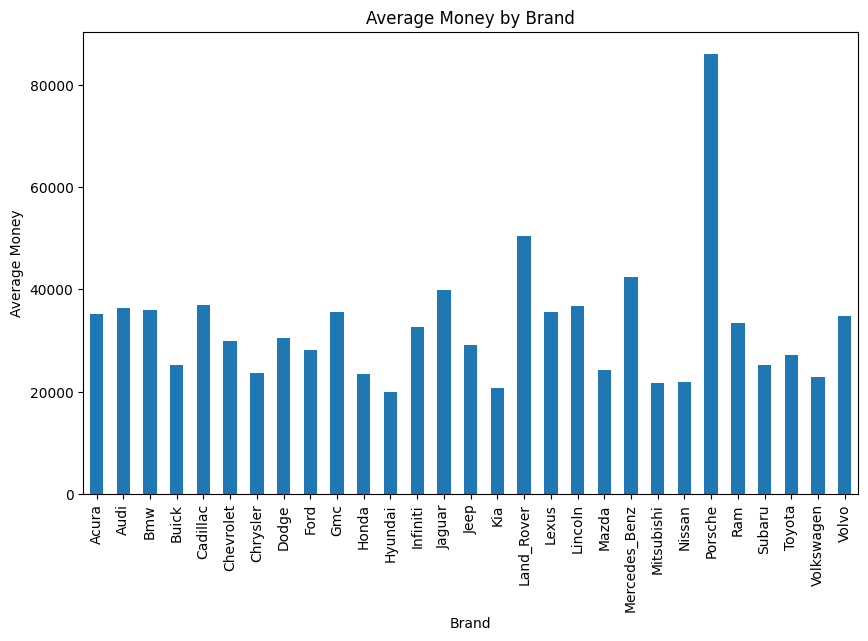

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_viz is your DataFrame
# Convert 'money' column to numeric
df_viz['money'] = pd.to_numeric(df_viz['money'], errors='coerce')

# Group by 'brand' and calculate average money
avg_money_by_brand = df_viz.groupby('brand')['money'].mean().reset_index()

# Plot the results
avg_money_by_brand.plot(kind='bar', x='brand', y='money', figsize=(10, 6), legend=False)
plt.title('Average Money by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Money')
plt.show()


In [46]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140538 entries, 0 to 140537
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   new&used        140538 non-null  object
 1   name            140538 non-null  object
 2   money           140538 non-null  int64 
 3   Exterior color  140538 non-null  object
 4   Drivetrain      140538 non-null  object
 5   Fuel type       140538 non-null  object
 6   Transmission    140538 non-null  object
 7   Engine          140538 non-null  object
 8   Mileage         140538 non-null  int64 
 9   Safety          140538 non-null  object
 10  brand           140538 non-null  object
 11  Year            140538 non-null  object
 12  Model           140538 non-null  object
 13  currency        140538 non-null  object
 14  MPG             140538 non-null  object
dtypes: int64(2), object(13)
memory usage: 16.1+ MB


Text(0, 0.5, 'Milageg')

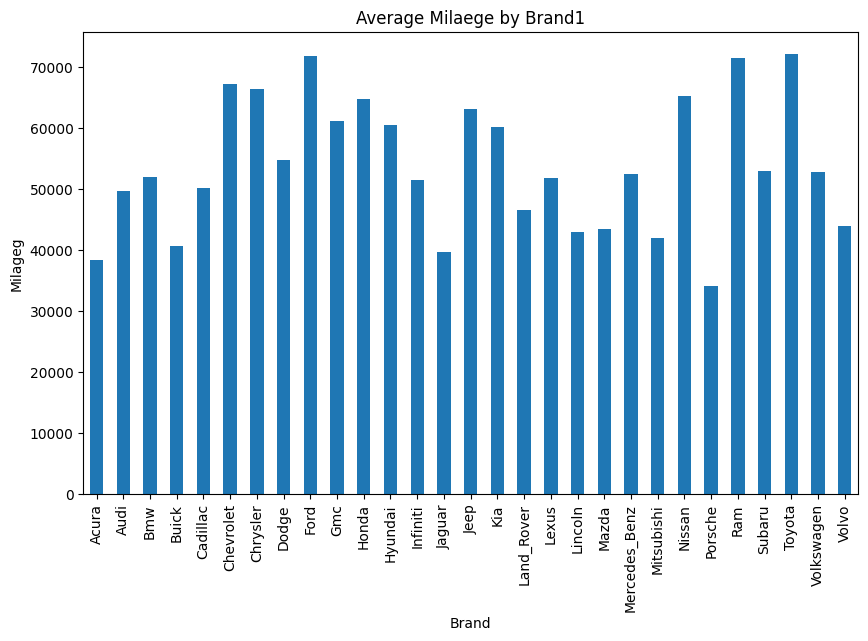

In [51]:
df_viz['Mileage'] = pd.to_numeric(df_viz['Mileage'], errors = 'coerce')

avg_mileage_by_brand = df_viz.groupby('brand')['Mileage'].mean().reset_index()

avg_mileage_by_brand.plot(kind='bar',x='brand',y='Mileage', figsize=(10,6), legend=False )

plt.title("Average Milaege by Brand1")
plt.xlabel("Brand")
plt.ylabel('Milageg')

In [48]:
df_viz.head()

,new&used,name,money,Exterior color,Drivetrain,Fuel type,Transmission,Engine,Mileage,Safety,brand,Year,Model,currency,MPG
0,New,2023 Acura Integra Base,33095,Liquid Carbon Metallic,Fwd,Gasoline,Automatic Cvt,1.5L I4 16V Gdi Dohc Turbo,5,Automatic Emergency BrakingBackup CameraBrake ...,Acura,2023-01-01,Integra Base,$,30
1,New,2023 Acura Mdx A-Spec,61745,Majestic Black Pearl,Awd,Gasoline,10-Speed Automatic,3.5L V6 24V Gdi Sohc,0,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Mdx A-Spec,$,19
2,New,2023 Acura Integra A-Spec Technology,38095,Majestic Black Pearl,Fwd,Gasoline,6-Speed Manual,1.5L I4 16V Gdi Dohc Turbo,5,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Integra A-Spec Technology,$,26
3,New,2023 Acura Tlx A-Spec,47995,Majestic Black Pearl,Fwd,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,11,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Tlx A-Spec,$,22
4,New,2023 Acura Tlx A-Spec,47995,Platinum White Pearl,Fwd,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,2,Backup CameraBrake AssistLane Departure Warnin...,Acura,2023-01-01,Tlx A-Spec,$,22


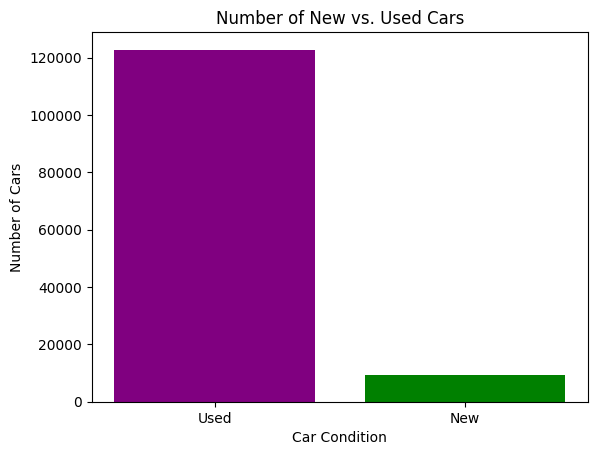

In [59]:
df_viz = df_viz[df_viz['new&used'].isin(['New', 'Used'])]

# Group by 'new&used' and count the occurrences
car_counts = df_viz['new&used'].value_counts()

# Create the bar chart
plt.bar(car_counts.index, car_counts.values, color=['purple', 'green'])
plt.xlabel('Car Condition')
plt.ylabel('Number of Cars')
plt.title('Number of New vs. Used Cars')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal
plt.show()

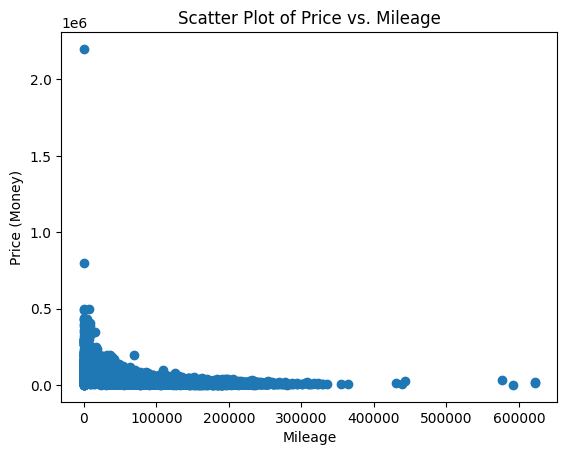

In [61]:
plt.scatter(x=df_viz['Mileage'], y=df_viz['money'])
plt.xlabel('Mileage')
plt.ylabel('Price (Money)')
plt.title('Scatter Plot of Price vs. Mileage')
plt.show()

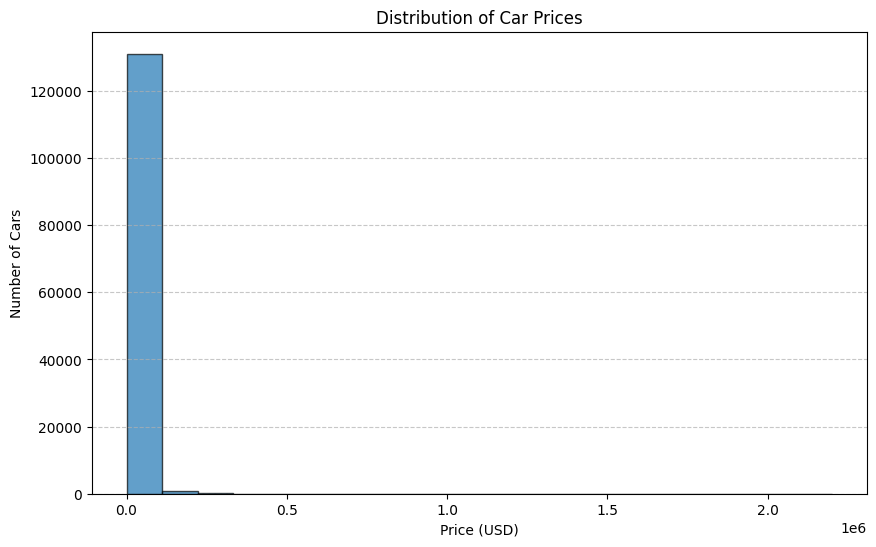

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(df_viz['money'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Cars')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

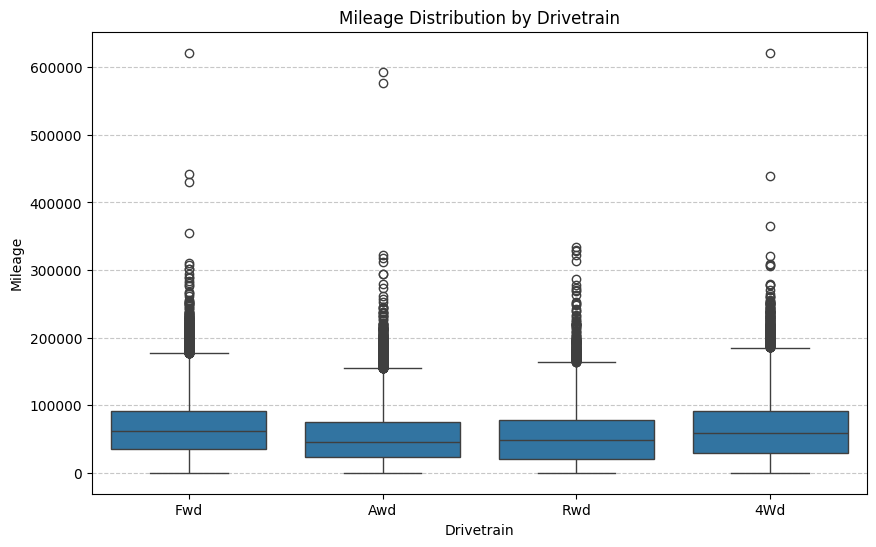

: 

In [65]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drivetrain', y='Mileage', data=df_viz)
plt.title('Mileage Distribution by Drivetrain')
plt.xlabel('Drivetrain')
plt.ylabel('Mileage')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()